In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#데이터 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

In [5]:
weather_df_jeju = pd.read_csv("/content/drive/MyDrive/weather_df_제주.csv")
weather_df_gosan = pd.read_csv("/content/drive/MyDrive/weather_df_고산.csv")
weather_df_seongsan = pd.read_csv("/content/drive/MyDrive/weather_df_성산.csv")
weather_df_seo = pd.read_csv("/content/drive/MyDrive/weather_df_서귀포.csv")
electricity_demand = pd.read_csv("/content/drive/MyDrive/전력 수요량 시간별 데이터_new.csv")

In [6]:
electricity_demand

,date,hour,area,electricity demand(MWh)
0,2021-01-01,1,제주도,746329
1,2021-01-01,2,제주도,710544
2,2021-01-01,3,제주도,685313
3,2021-01-01,4,제주도,674663
4,2021-01-01,5,제주도,673656
...,...,...,...,...
18931,2023-02-28,20,제주도,868446
18932,2023-02-28,21,제주도,861506
18933,2023-02-28,22,제주도,830525
18934,2023-02-28,23,제주도,799712


In [7]:
merged_df_jeju = weather_df_jeju.merge(electricity_demand[['date', 'hour', 'electricity demand(MWh)']], on=['date', 'hour'], how='left')
# date 열을 datetime 형식으로 변환합니다.
merged_df_jeju['date'] = pd.to_datetime(merged_df_jeju['date'])

# 날짜 열을 기반으로 요일을 추출하여 새로운 열에 추가합니다.
merged_df_jeju['weekday'] = merged_df_jeju['date'].dt.dayofweek
merged_df_jeju

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature,Q12,Q13,Q_mean,electricity demand(MWh),weekday
0,2021-01-01,1,320.0,6.1,9.0,0.0,53.0,4.5,0.0,0.0,0.0,746329,4
1,2021-01-01,2,320.0,5.6,9.0,0.0,58.0,4.3,0.0,0.0,0.0,710544,4
2,2021-01-01,3,320.0,5.5,10.0,0.0,54.0,4.2,0.0,0.0,0.0,685313,4
3,2021-01-01,4,320.0,5.4,10.0,0.0,52.0,4.3,0.0,0.0,0.0,674663,4
4,2021-01-01,5,290.0,4.2,10.0,0.0,47.0,4.2,0.0,0.0,0.0,673656,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2022-12-31,20,320.0,3.4,6.0,0.0,60.0,6.9,0.0,0.0,0.0,926980,5
17516,2022-12-31,21,290.0,2.9,7.0,0.0,59.0,6.8,0.0,0.0,0.0,921498,5
17517,2022-12-31,22,320.0,3.2,6.0,0.0,61.0,6.8,0.0,0.0,0.0,903747,5
17518,2022-12-31,23,250.0,1.9,3.0,0.0,62.0,6.0,0.0,0.0,0.0,882189,5


In [8]:
merged_df_jeju.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 0 to 17519
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     17520 non-null  datetime64[ns]
 1   hour                     17520 non-null  int64         
 2   WindDirection            17518 non-null  float64       
 3   WindSpeed                17518 non-null  float64       
 4   Cloud                    17502 non-null  float64       
 5   Rainfall                 17520 non-null  float64       
 6   Humidity                 17520 non-null  float64       
 7   Temperature              17520 non-null  float64       
 8   Q12                      17520 non-null  float64       
 9   Q13                      17520 non-null  float64       
 10  Q_mean                   17520 non-null  float64       
 11  electricity demand(MWh)  17520 non-null  int64         
 12  weekday                  17520 n

In [9]:
merged_df_jeju = merged_df_jeju.dropna()

<ipython-input-10-a4742e4d20a3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df_jeju.corr(), annot=True, cmap=cmap)


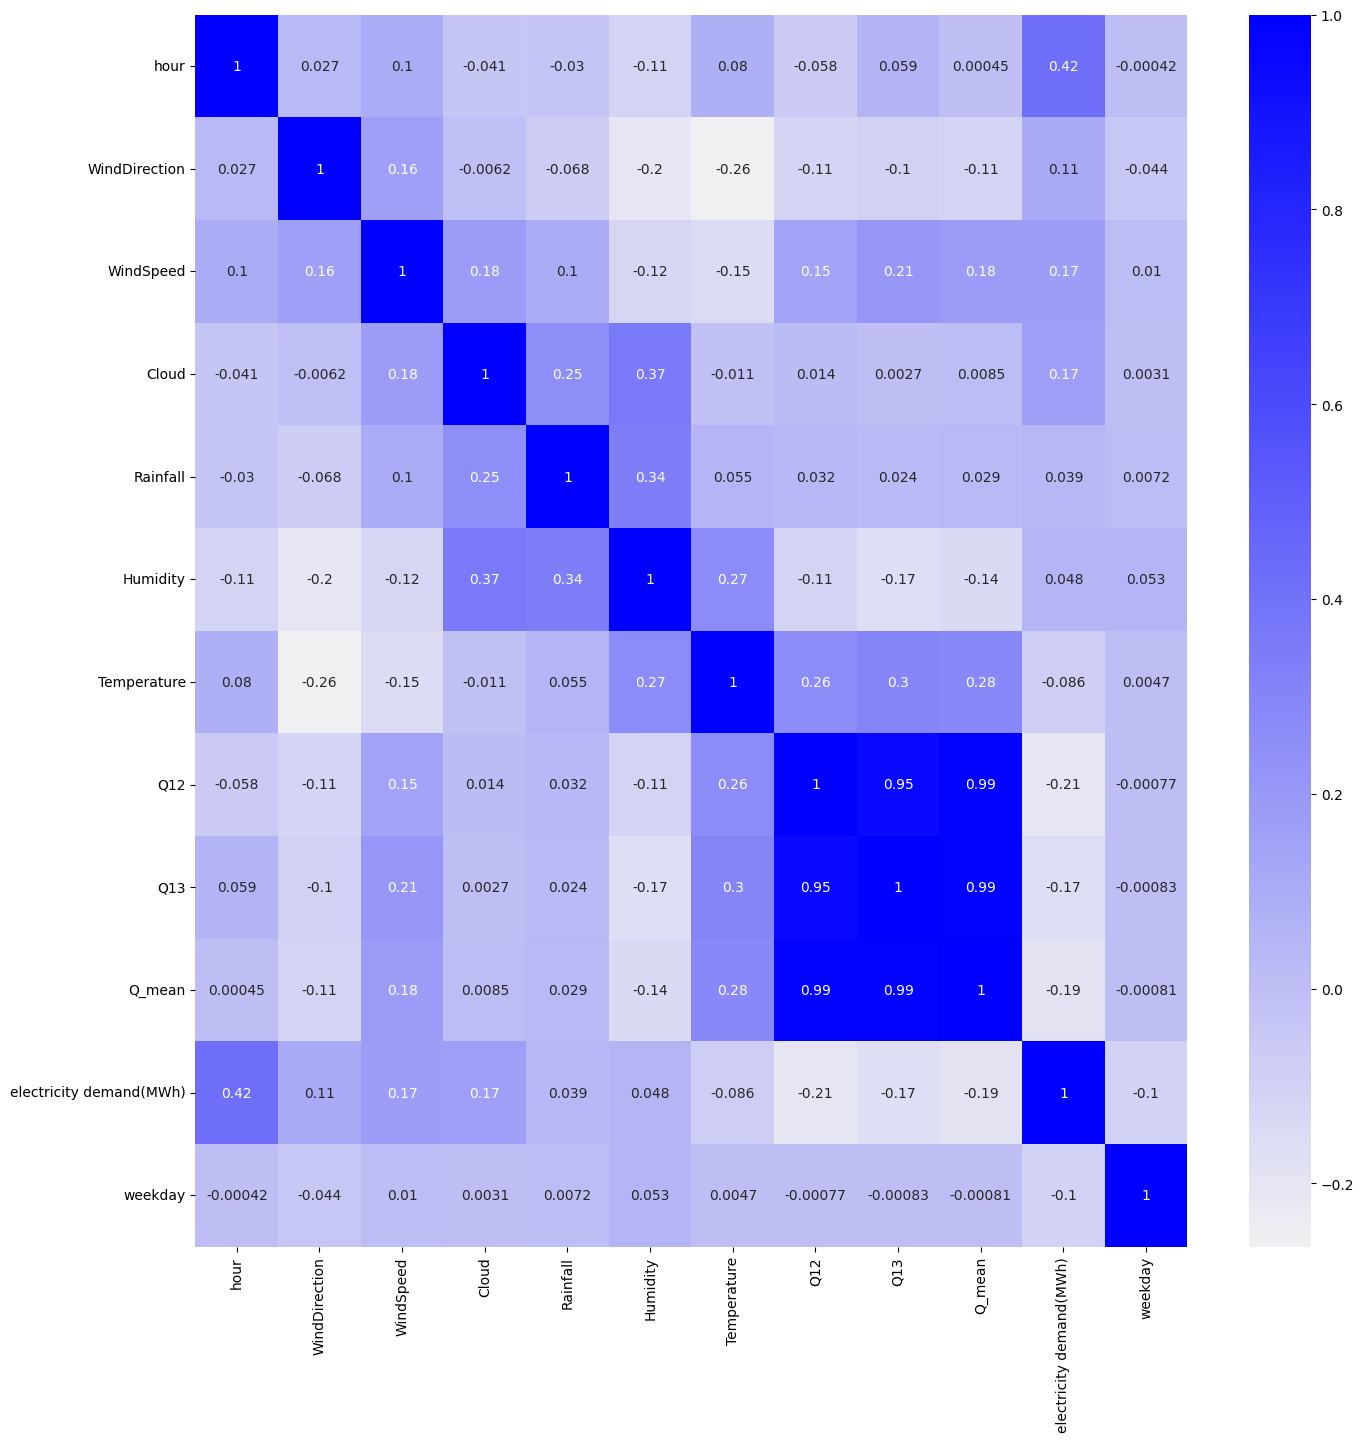

In [10]:
plt.figure(figsize=(16, 16))
cmap = sns.light_palette(color="b", as_cmap=True)
sns.heatmap(merged_df_jeju.corr(), annot=True, cmap=cmap)
plt.show()

#모델링

In [11]:
import os
from tqdm import tqdm
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [12]:
ss = StandardScaler()

columns_to_scale = ['WindDirection', 'WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature', 'Q12', 'Q13', 'Q_mean', 'weekday']
merged_df_jeju[columns_to_scale] = ss.fit_transform(merged_df_jeju[columns_to_scale])

<ipython-input-12-371f1a94f276>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_jeju[columns_to_scale] = ss.fit_transform(merged_df_jeju[columns_to_scale])


In [13]:
features = merged_df_jeju.drop(['date', 'WindDirection', 'WindSpeed', 'Q12', 'Q_mean', 'electricity demand(MWh)'], axis=1)
labels = merged_df_jeju['electricity demand(MWh)']

In [14]:
class ElecDemandDataset(Dataset):
    def __init__(self, features, labels, window_size=2, step_size=1):
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32)
        self.window_size = window_size
        self.step_size = step_size

    def __len__(self):
        total_steps = len(self.features) - self.window_size + 1
        # Calculate the number of complete windows that can be formed
        if total_steps > 0:
            return (total_steps + self.step_size - 1) // self.step_size
        else:
            return 0

    def __getitem__(self, index):
        start = index * self.step_size
        end = start + self.window_size

        return (self.features[start:end], self.labels[start:end])

In [15]:
col_name = list(features.columns)
col_name

['hour', 'Cloud', 'Rainfall', 'Humidity', 'Temperature', 'Q13', 'weekday']

In [16]:
features_train, features_val, labels_train, labels_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [17]:
train_dataset = ElecDemandDataset(features_train, labels_train)
val_dataset = ElecDemandDataset(features_val, labels_val)

In [18]:
len(train_dataset), len(val_dataset)

(13999, 3499)

In [19]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [20]:
print(train_dataset[0])
print(train_dataset[0][0].shape)
print(train_dataset[0][1].shape)

(tensor([[ 1.3000e+01, -3.2370e-01, -2.4356e-01, -2.0510e+00, -1.0677e+00,
          9.7481e-01,  9.9864e-01],
        [ 1.3000e+01, -4.1787e-02, -2.4356e-01, -5.4015e-01, -2.0509e-01,
          1.1973e+00, -1.9440e-03]]), tensor([503508., 568131.]))
torch.Size([2, 7])
torch.Size([2])


In [21]:
train_features, train_labels = next(iter(train_loader))
print(train_features.shape)
print(train_labels.shape)

torch.Size([64, 2, 7])
torch.Size([64, 2])


#Train

In [22]:
!pip install transformers

In [23]:
import torch
import torch.nn as nn

try:
    from transformers.modeling_bert import BertConfig, BertEncoder, BertModel
except:
    from transformers.models.bert.modeling_bert import BertConfig, BertEncoder, BertModel

In [24]:
class LSTMwithAttn(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, num_heads=8, dropout=0.1, device='cpu'):
        super(LSTMwithAttn, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.output_dim = output_dim
        self.dropout = dropout
        self.device = device

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        self.config = BertConfig(
            hidden_size=hidden_dim,
            num_hidden_layers=num_layers,
            num_attention_heads=num_heads,
            intermediate_size=hidden_dim,
            hidden_dropout_prob=dropout,
            attention_probs_dropout_prob=dropout,
        )
        self.encoder = BertEncoder(self.config)

        self.act = nn.SiLU()
        self.fc = nn.Linear(hidden_dim, output_dim)

        self.init_weights()


    def init_hidden_state(self, batch_size):
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(self.device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(self.device)
        return (h0, c0)


    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)


    def generate_attn_mask(self, x):
        seq_len = x.size(1)
        attn_mask = torch.tril(torch.ones((seq_len, seq_len))).view(1, seq_len, seq_len).to(self.device)

        return attn_mask


    def forward(self, x):
        batch_size = x.size(0)

        h0, c0 = self.init_hidden_state(batch_size)

        output, (hidden, cell) = self.lstm(x, (h0, c0))

        output = output.contiguous().view(batch_size, -1, self.hidden_dim)

        # Attention Mask
        attn_mask = self.generate_attn_mask(x)
        extended_attn_mask = attn_mask[None, :, :, :].expand(batch_size, -1, -1, -1)
        extended_attn_mask = (1.0 - extended_attn_mask) * -10000.0

        encoder_outputs = self.encoder(output, attention_mask=extended_attn_mask)

        output = self.act(encoder_outputs.last_hidden_state)
        output = self.fc(output)

        return output

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [26]:
model = LSTMwithAttn(input_dim=7, hidden_dim=64, output_dim=1, num_layers=2, device=device)

In [27]:
model = model.to(device)

In [28]:
LEARNING_RATE = 0.001
EPOCHS = 100
WEIGHT_DECAY = 0.01
EARLY_STOPPING = 5

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [30]:
criterion = nn.MSELoss(reduction='mean')

In [31]:
train_losses = []
val_losses = []

loss = .0
best_val_loss = float('inf')
increasing_loss_count = 0

In [32]:
model.eval()

with torch.no_grad():
    for features, labels in val_loader:
        features = features.to(device)
        labels = labels.to(device)

        outputs = model(features)

        _loss = criterion(outputs.squeeze(-1), labels)

        loss += _loss.item()

print(f'Initial Loss: {loss/len(val_loader):.4f}')

Initial Loss: 492631910586.1818


In [33]:
train_losses = []
val_losses = []

for i in range(EPOCHS):
    print("=" * 30)
    print(f"Current Epoch {i+1}")
    print("=" * 30)
    print("Training...")
    train_loss = .0

    model.train()
    for features, labels in tqdm(train_loader, leave=False):
        features = features.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(features)

        _loss = criterion(outputs.squeeze(-1), labels)
        _loss.backward()
        optimizer.step()

        train_loss += _loss.item()


    print("Evaluating...")
    val_loss = .0

    model.eval()

    for features, labels in tqdm(val_loader, leave=False):
        features = features.to(device)
        labels = labels.to(device)

        outputs = model(features)

        _loss = criterion(outputs.squeeze(-1), labels)

        val_loss += _loss.item()

    train_losses += [train_loss/len(train_loader)]
    epoch_val_loss = val_loss/len(val_loader)
    val_losses += [epoch_val_loss]
    print(f"Epoch #{i+1}: [Training MSE/Validation MSE]: [{train_loss/len(train_loader):.4f}/{val_loss/len(val_loader):.4f}]")

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        increasing_loss_count = 0
    else:
        increasing_loss_count += 1

    if increasing_loss_count >= EARLY_STOPPING:
        print("Early Stopping!")
        break

Current Epoch 1
Training...


Evaluating...


Epoch #1: [Training MSE/Evaluation MSE]: [490343503413.7717/492601457198.5455]
Current Epoch 2
Training...


Evaluating...


Epoch #2: [Training MSE/Evaluation MSE]: [490313420594.2648/492564052228.6545]
Current Epoch 3
Training...


Evaluating...


Epoch #3: [Training MSE/Evaluation MSE]: [490269009929.3516/492512505185.7455]
Current Epoch 4
Training...


Evaluating...


Epoch #4: [Training MSE/Evaluation MSE]: [490210650719.8539/492447150303.4182]
Current Epoch 5
Training...


Evaluating...


Epoch #5: [Training MSE/Evaluation MSE]: [490138893737.4977/492368762693.8182]
Current Epoch 6
Training...


Evaluating...


Epoch #6: [Training MSE/Evaluation MSE]: [490054405115.3242/492277867836.5091]
Current Epoch 7
Training...


Evaluating...


Epoch #7: [Training MSE/Evaluation MSE]: [489957768692.3105/492175064492.2182]
Current Epoch 8
Training...


Evaluating...


Epoch #8: [Training MSE/Evaluation MSE]: [489849521325.0046/492060972274.0364]
Current Epoch 9
Training...


Evaluating...


Epoch #9: [Training MSE/Evaluation MSE]: [489730141515.9818/491935850347.0546]
Current Epoch 10
Training...


Evaluating...


Epoch #10: [Training MSE/Evaluation MSE]: [489600128266.5206/491800389818.1818]
Current Epoch 11
Training...


Evaluating...


Epoch #11: [Training MSE/Evaluation MSE]: [489459923570.5571/491654857597.6727]
Current Epoch 12
Training...


Evaluating...


Epoch #12: [Training MSE/Evaluation MSE]: [489309938150.2831/491499776186.1818]
Current Epoch 13
Training...


Evaluating...


Epoch #13: [Training MSE/Evaluation MSE]: [489150548613.2603/491335401174.1091]
Current Epoch 14
Training...


Evaluating...


Epoch #14: [Training MSE/Evaluation MSE]: [488982064385.1689/491162094796.8000]
Current Epoch 15
Training...


Evaluating...


Epoch #15: [Training MSE/Evaluation MSE]: [488804783520.1461/490980101920.5818]
Current Epoch 16
Training...


Evaluating...


Epoch #16: [Training MSE/Evaluation MSE]: [488618952601.1324/490789623919.7091]
Current Epoch 17
Training...


Evaluating...


Epoch #17: [Training MSE/Evaluation MSE]: [488424770630.1370/490590906256.2909]
Current Epoch 18
Training...


Evaluating...


Epoch #18: [Training MSE/Evaluation MSE]: [488222427631.6347/490384057362.6182]
Current Epoch 19
Training...


Evaluating...


Epoch #19: [Training MSE/Evaluation MSE]: [488012084004.2374/490169229163.0546]
Current Epoch 20
Training...


Evaluating...


Epoch #20: [Training MSE/Evaluation MSE]: [487793863637.9178/489946621840.2909]
Current Epoch 21
Training...


Evaluating...


Epoch #21: [Training MSE/Evaluation MSE]: [487567962841.4247/489716395063.8546]
Current Epoch 22
Training...


Evaluating...


Epoch #22: [Training MSE/Evaluation MSE]: [487334269844.4566/489478323628.2182]
Current Epoch 23
Training...


Evaluating...


Epoch #23: [Training MSE/Evaluation MSE]: [487093081953.0228/489232893095.5637]
Current Epoch 24
Training...


Evaluating...


Epoch #24: [Training MSE/Evaluation MSE]: [486844408743.1598/488979890771.7818]
Current Epoch 25
Training...


Evaluating...


Epoch #25: [Training MSE/Evaluation MSE]: [486588317995.2512/488719543649.7455]
Current Epoch 26
Training...


Evaluating...


Epoch #26: [Training MSE/Evaluation MSE]: [486324875843.7991/488451874964.9454]
Current Epoch 27
Training...


Evaluating...


Epoch #27: [Training MSE/Evaluation MSE]: [486054115056.8036/488176817394.0364]
Current Epoch 28
Training...


Evaluating...


Epoch #28: [Training MSE/Evaluation MSE]: [485776104162.7762/487894611037.0909]
Current Epoch 29
Training...


Evaluating...


Epoch #29: [Training MSE/Evaluation MSE]: [485490876528.2192/487605106352.8727]
Current Epoch 30
Training...


Evaluating...


Epoch #30: [Training MSE/Evaluation MSE]: [485198474197.9178/487308482671.7091]
Current Epoch 31
Training...


Evaluating...


Epoch #31: [Training MSE/Evaluation MSE]: [484898935027.1415/487004734035.7818]
Current Epoch 32
Training...


Evaluating...


Epoch #32: [Training MSE/Evaluation MSE]: [484592281609.3516/486693799675.3455]
Current Epoch 33
Training...


Evaluating...


Epoch #33: [Training MSE/Evaluation MSE]: [484278555540.4566/486375832706.3273]
Current Epoch 34
Training...


Evaluating...


Epoch #34: [Training MSE/Evaluation MSE]: [483957949388.5662/486050863513.6000]
Current Epoch 35
Training...


Evaluating...


Epoch #35: [Training MSE/Evaluation MSE]: [483629985997.7352/485718802729.8909]
Current Epoch 36
Training...


Evaluating...


Epoch #36: [Training MSE/Evaluation MSE]: [483295185017.5708/485379757000.1454]
Current Epoch 37
Training...


Evaluating...


Epoch #37: [Training MSE/Evaluation MSE]: [482953426149.1141/485033796030.8364]
Current Epoch 38
Training...


Evaluating...


Epoch #38: [Training MSE/Evaluation MSE]: [482604719866.1553/484680784579.4909]
Current Epoch 39
Training...


Evaluating...


Epoch #39: [Training MSE/Evaluation MSE]: [482249082477.8813/484320897805.9636]
Current Epoch 40
Training...


Evaluating...


Epoch #40: [Training MSE/Evaluation MSE]: [481886548547.7991/483954088047.7091]
Current Epoch 41
Training...


Evaluating...


Epoch #41: [Training MSE/Evaluation MSE]: [481517120469.9178/483580435139.4909]
Current Epoch 42
Training...


Evaluating...


Epoch #42: [Training MSE/Evaluation MSE]: [481140839540.8950/483199839585.7455]
Current Epoch 43
Training...


Evaluating...


Epoch #43: [Training MSE/Evaluation MSE]: [480757710548.7488/482812465226.4727]
Current Epoch 44
Training...


Evaluating...


Epoch #44: [Training MSE/Evaluation MSE]: [480367761024.5845/482418257249.7455]
Current Epoch 45
Training...


Evaluating...


Epoch #45: [Training MSE/Evaluation MSE]: [479971007726.4658/482017209101.9636]
Current Epoch 46
Training...


Evaluating...


Epoch #46: [Training MSE/Evaluation MSE]: [479567467412.4566/481609338656.5818]
Current Epoch 47
Training...


Evaluating...


Epoch #47: [Training MSE/Evaluation MSE]: [479157163723.3973/481194733493.5273]
Current Epoch 48
Training...


Evaluating...


Epoch #48: [Training MSE/Evaluation MSE]: [478740113566.9772/480773403145.3091]
Current Epoch 49
Training...


Evaluating...


Epoch #49: [Training MSE/Evaluation MSE]: [478316339087.7808/480345279692.8000]
Current Epoch 50
Training...


Evaluating...


Epoch #50: [Training MSE/Evaluation MSE]: [477885838340.6758/479910464418.9091]
Current Epoch 51
Training...


Evaluating...


Epoch #51: [Training MSE/Evaluation MSE]: [477448658457.7169/479469010944.0000]
Current Epoch 52
Training...


Evaluating...


Epoch #52: [Training MSE/Evaluation MSE]: [477005227667.2877/479020977654.6909]
Current Epoch 53
Training...


Evaluating...


Epoch #53: [Training MSE/Evaluation MSE]: [476554296446.2466/478565933800.7273]
Current Epoch 54
Training...


Evaluating...


Epoch #54: [Training MSE/Evaluation MSE]: [476097120901.2603/478104463248.2909]
Current Epoch 55
Training...


Evaluating...


Epoch #55: [Training MSE/Evaluation MSE]: [475633342080.5845/477636345558.1091]
Current Epoch 56
Training...


Evaluating...


Epoch #56: [Training MSE/Evaluation MSE]: [475162949660.0548/477161594433.1636]
Current Epoch 57
Training...


Evaluating...


Epoch #57: [Training MSE/Evaluation MSE]: [474685978352.8036/476680212852.3636]
Current Epoch 58
Training...


Evaluating...


Epoch #58: [Training MSE/Evaluation MSE]: [474202428009.2055/476192290182.9818]
Current Epoch 59
Training...


Evaluating...


Epoch #59: [Training MSE/Evaluation MSE]: [473712336334.9041/475697837149.0909]
Current Epoch 60
Training...


Evaluating...


Epoch #60: [Training MSE/Evaluation MSE]: [473215696447.1233/475196865666.3273]
Current Epoch 61
Training...


Evaluating...


Epoch #61: [Training MSE/Evaluation MSE]: [472712554879.4155/474689317348.0728]
Current Epoch 62
Training...


Evaluating...


Epoch #62: [Training MSE/Evaluation MSE]: [472202894125.5891/474175261305.0182]
Current Epoch 63
Training...


Evaluating...


Epoch #63: [Training MSE/Evaluation MSE]: [471686752789.0411/473654739837.6727]
Current Epoch 64
Training...


Evaluating...


Epoch #64: [Training MSE/Evaluation MSE]: [471164158700.1279/473127734476.8000]
Current Epoch 65
Training...


Evaluating...


Epoch #65: [Training MSE/Evaluation MSE]: [470635102133.1872/472594283948.2182]
Current Epoch 66
Training...


Evaluating...


Epoch #66: [Training MSE/Evaluation MSE]: [470099626030.7580/472054378123.6364]
Current Epoch 67
Training...


Evaluating...


Epoch #67: [Training MSE/Evaluation MSE]: [469557722761.9361/471508043813.2364]
Current Epoch 68
Training...


Evaluating...


Epoch #68: [Training MSE/Evaluation MSE]: [469009425842.8493/470955288166.4000]
Current Epoch 69
Training...


Evaluating...


Epoch #69: [Training MSE/Evaluation MSE]: [468454746345.7900/470396195784.1454]
Current Epoch 70
Training...


Evaluating...


Epoch #70: [Training MSE/Evaluation MSE]: [467893713298.1187/469830708875.6364]
Current Epoch 71
Training...


Evaluating...


Epoch #71: [Training MSE/Evaluation MSE]: [467326327747.2146/469258851272.1454]
Current Epoch 72
Training...


Evaluating...


Epoch #72: [Training MSE/Evaluation MSE]: [466752622311.4520/468680691488.5818]
Current Epoch 73
Training...


Evaluating...


Epoch #73: [Training MSE/Evaluation MSE]: [466172597888.5845/468096255739.3455]
Current Epoch 74
Training...


Evaluating...


Epoch #74: [Training MSE/Evaluation MSE]: [465586306847.5616/467505474913.7455]
Current Epoch 75
Training...


Evaluating...


Epoch #75: [Training MSE/Evaluation MSE]: [464993682754.6301/466908366885.2364]
Current Epoch 76
Training...


Evaluating...


Epoch #76: [Training MSE/Evaluation MSE]: [464394840971.1050/466305025191.5637]
Current Epoch 77
Training...


Evaluating...


Epoch #77: [Training MSE/Evaluation MSE]: [463789756359.8904/465695451620.0728]
Current Epoch 78
Training...


Evaluating...


Epoch #78: [Training MSE/Evaluation MSE]: [463178443883.5434/465079668810.4727]
Current Epoch 79
Training...


Evaluating...


Epoch #79: [Training MSE/Evaluation MSE]: [462561266533.6986/464457692253.0909]
Current Epoch 80
Training...


Evaluating...


Epoch #80: [Training MSE/Evaluation MSE]: [461937225709.2968/463829454028.8000]
Current Epoch 81
Training...


Evaluating...


Epoch #81: [Training MSE/Evaluation MSE]: [461307350235.7626/463195047675.3455]
Current Epoch 82
Training...


Evaluating...


Epoch #82: [Training MSE/Evaluation MSE]: [460671337420.5662/462554561964.2182]
Current Epoch 83
Training...


Evaluating...


Epoch #83: [Training MSE/Evaluation MSE]: [460029181727.5616/461907863440.2909]
Current Epoch 84
Training...


Evaluating...


Epoch #84: [Training MSE/Evaluation MSE]: [459380902159.1964/461255108794.1818]
Current Epoch 85
Training...


Evaluating...


Epoch #85: [Training MSE/Evaluation MSE]: [458726546446.0274/460596173507.4909]
Current Epoch 86
Training...


Evaluating...


Epoch #86: [Training MSE/Evaluation MSE]: [458066095286.3561/459931216653.9636]
Current Epoch 87
Training...


Evaluating...


Epoch #87: [Training MSE/Evaluation MSE]: [457399591024.2192/459260181634.3273]
Current Epoch 88
Training...


Evaluating...


Epoch #88: [Training MSE/Evaluation MSE]: [456727052512.4384/458583087513.6000]
Current Epoch 89
Training...


Evaluating...


Epoch #89: [Training MSE/Evaluation MSE]: [456048484688.6575/457899932504.4363]
Current Epoch 90
Training...


Evaluating...


Epoch #90: [Training MSE/Evaluation MSE]: [455363915832.1096/457210819677.0909]
Current Epoch 91
Training...


Evaluating...


Epoch #91: [Training MSE/Evaluation MSE]: [454673364197.1141/456515694219.6364]
Current Epoch 92
Training...


Evaluating...


Epoch #92: [Training MSE/Evaluation MSE]: [453976847738.7397/455814639541.5273]
Current Epoch 93
Training...


Evaluating...


Epoch #93: [Training MSE/Evaluation MSE]: [453274376781.1507/455107607384.4363]
Current Epoch 94
Training...


Evaluating...


Epoch #94: [Training MSE/Evaluation MSE]: [452565966286.9041/454394587620.0728]
Current Epoch 95
Training...


Evaluating...


Epoch #95: [Training MSE/Evaluation MSE]: [451851659348.1644/453675693446.9818]
Current Epoch 96
Training...


Evaluating...


Epoch #96: [Training MSE/Evaluation MSE]: [451131460154.4475/452950932610.3273]
Current Epoch 97
Training...


Evaluating...


Epoch #97: [Training MSE/Evaluation MSE]: [450405566211.5068/452222746028.2182]
Current Epoch 98
Training...


Evaluating...


Epoch #98: [Training MSE/Evaluation MSE]: [449673842257.8265/451483741835.6364]
Current Epoch 99
Training...


Evaluating...


Epoch #99: [Training MSE/Evaluation MSE]: [448935704753.6804/450741358368.5818]
Current Epoch 100
Training...


Evaluating...


Epoch #100: [Training MSE/Evaluation MSE]: [448192127312.6575/449993164241.4545]


In [34]:
%matplotlib inline

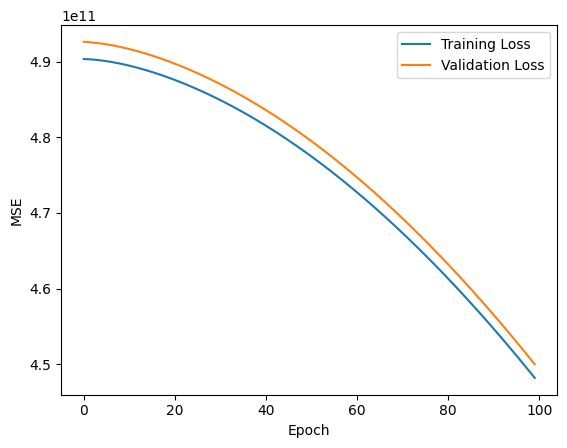

In [35]:
plt.plot(range(len(train_losses)), train_losses, label="Training Loss")
plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [36]:
directory = 'models'
os.makedirs(directory, exist_ok=True)

torch.save(model.state_dict(), 'models/model.pt')

#내일 데이터 불러오기

In [59]:
import pandas as pd
import urllib
import urllib.request
import json

In [60]:
from datetime import date, timedelta
#오늘 날짜 불러오기
today = date.today()
formatted_today = today.strftime('%Y%m%d')
tomorrow = today + timedelta(days=1)
formatted_tomorrow = tomorrow.strftime('%Y%m%d')

In [61]:
servicekey = 's+fQ9LDUrt9xJ9LSIp0R4+gJBR7eOiUpRHNKXMb6gaV844FL4oI+OYVOY+MC2Bff+Iq9bQWFeWrktswAfBtkyg=='
url= 'http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst'

queryParams = '?' + urllib.parse.urlencode(
    {
        urllib.parse.quote_plus('servicekey') : servicekey,
        urllib.parse.quote_plus('pageNo') : '1',
        urllib.parse.quote_plus('numOfRows') : '372',  # 12 * 31 = 372
       # 아님 12개 항목임
        urllib.parse.quote_plus('dataType') : 'JSON', # JSON, XML 두가지 포멧을 제공합니다.
        urllib.parse.quote_plus('base_date') : formatted_today, # 예보 받을 날짜를 입력합니다. 최근 1일간의 자료만 제공합니다.
        urllib.parse.quote_plus('base_time') : '1700', # 예보 시간을 입력합니다. 2시부터 시작하여 3시간 단위로 입력 가능합니다.
        urllib.parse.quote_plus('nx') : '48', # 울산 태양광 발전소 x 좌표입니다. '기상청18_동네예보 조회서비스_오픈API활용가이드.zip'에 포함 된 excel파일을 통해 확인 가능합니다.
        urllib.parse.quote_plus('ny') : '36' # 울산 태양광 발전소 y 좌표입니다. '기상청18_동네예보 조회서비스_오픈API활용가이드.zip'에 포함 된 excel파일을 통해 확인 가능합니다.
    }
)

response = urllib.request.urlopen(url + queryParams).read()
response = json.loads(response)
print(response)

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'}, 'body': {'dataType': 'JSON', 'items': {'item': [{'baseDate': '20240215', 'baseTime': '1700', 'category': 'TMP', 'fcstDate': '20240215', 'fcstTime': '1800', 'fcstValue': '7', 'nx': 48, 'ny': 36}, {'baseDate': '20240215', 'baseTime': '1700', 'category': 'UUU', 'fcstDate': '20240215', 'fcstTime': '1800', 'fcstValue': '-0.2', 'nx': 48, 'ny': 36}, {'baseDate': '20240215', 'baseTime': '1700', 'category': 'VVV', 'fcstDate': '20240215', 'fcstTime': '1800', 'fcstValue': '-9.6', 'nx': 48, 'ny': 36}, {'baseDate': '20240215', 'baseTime': '1700', 'category': 'VEC', 'fcstDate': '20240215', 'fcstTime': '1800', 'fcstValue': '2', 'nx': 48, 'ny': 36}, {'baseDate': '20240215', 'baseTime': '1700', 'category': 'WSD', 'fcstDate': '20240215', 'fcstTime': '1800', 'fcstValue': '9.6', 'nx': 48, 'ny': 36}, {'baseDate': '20240215', 'baseTime': '1700', 'category': 'SKY', 'fcstDate': '20240215', 'fcstTime': '1800', 'fcstValue': '4', 'nx': 

In [62]:
import pandas as pd

# 새로운 데이터프레임을 생성
fcst_df = pd.DataFrame(columns=['Forecast_date', 'Forecast_hour', 'WindDirection', 'WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature'])

row_idx = 0  # row_idx 초기화

for data in response['response']['body']['items']['item']:
    fcst_df.loc[row_idx, 'Forecast_date'] = data['fcstDate']
    fcst_df.loc[row_idx, 'Forecast_hour'] = data['fcstTime']

    if data['category'] == 'REH':
        fcst_df.loc[row_idx, 'Humidity'] = float(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'PCP':
        fcst_df.loc[row_idx, 'Rainfall'] = str(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'TMP':
        fcst_df.loc[row_idx, 'Temperature'] = float(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'SKY':
        fcst_df.loc[row_idx, 'Cloud'] = float(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'VEC':
        fcst_df.loc[row_idx, 'WindDirection'] = float(data.get('fcstValue', 'NaN'))
    elif data['category'] == 'WSD':
        fcst_df.loc[row_idx, 'WindSpeed'] = float(data.get('fcstValue', 'NaN'))
        row_idx += 1  # 다음 행으로 이동

In [63]:
# Forecast_date와 Forecast_hour 열을 datetime 형식으로 변환
fcst_df['Forecast_date'] = pd.to_datetime(fcst_df['Forecast_date'], format='%Y%m%d')
fcst_df['Forecast_hour'] = fcst_df['Forecast_hour'].astype(str).str.zfill(4)  # 시간을 4자리 문자열로 변환
fcst_df['Forecast_hour'] = fcst_df['Forecast_hour'].str[:2].astype(int)  # 앞의 2자리를 추출하여 정수로 변환

In [64]:
fcst_df = fcst_df.rename(columns={'Forecast_date': 'date', 'Forecast_hour': 'hour'})

# date가 '20240213'인 데이터만 추출하여 tomorrow_df에 저장
tomorrow_df = fcst_df[(fcst_df['date'] == formatted_tomorrow)].copy()

In [65]:
tomorrow_df.replace('강수없음', int('0'), inplace=True)

In [66]:
tomorrow_df

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature
6,2024-02-16,0,10.0,7.2,1.0,0,60.0,5.0
7,2024-02-16,1,7.0,6.4,4.0,0,65.0,5.0
8,2024-02-16,2,13.0,6.7,1.0,0,65.0,5.0
9,2024-02-16,3,18.0,6.5,1.0,0,70.0,5.0
10,2024-02-16,4,21.0,6.4,1.0,0,70.0,4.0
11,2024-02-16,5,22.0,5.9,3.0,0,70.0,4.0
12,2024-02-16,6,24.0,5.4,3.0,0,70.0,4.0
13,2024-02-16,7,28.0,4.7,3.0,0,75.0,3.0
14,2024-02-16,8,33.0,4.2,3.0,0,75.0,3.0
15,2024-02-16,9,39.0,4.4,3.0,0,75.0,5.0


In [67]:
# Rainfall 열 값 변경
rainfall_mapping = {'0': 0, '1mm 미만': 1, '1.0mm': 1, '2.0mm': 1, '3.0mm': 1}
tomorrow_df['Rainfall'] = tomorrow_df['Rainfall'].astype(str).map(rainfall_mapping).fillna(2).astype(int)

# Cloud 값 보정
cloud_mapping = {1: 2, 2: 4, 3: 8, 4: 10}
tomorrow_df['Cloud'] = tomorrow_df['Cloud'].map(cloud_mapping)

# hour 값 0~23 을 1~24로 수정
tomorrow_df['hour'] = tomorrow_df['hour'] + 1

tomorrow_df

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature
6,2024-02-16,1,10.0,7.2,2,0,60.0,5.0
7,2024-02-16,2,7.0,6.4,10,0,65.0,5.0
8,2024-02-16,3,13.0,6.7,2,0,65.0,5.0
9,2024-02-16,4,18.0,6.5,2,0,70.0,5.0
10,2024-02-16,5,21.0,6.4,2,0,70.0,4.0
11,2024-02-16,6,22.0,5.9,8,0,70.0,4.0
12,2024-02-16,7,24.0,5.4,8,0,70.0,4.0
13,2024-02-16,8,28.0,4.7,8,0,75.0,3.0
14,2024-02-16,9,33.0,4.2,8,0,75.0,3.0
15,2024-02-16,10,39.0,4.4,8,0,75.0,5.0


In [68]:
an = [1.000110,0.034221,0.000719]
bn = [0,0.001280,0.000077]
cn = [0.006918,-0.399912,-0.006758,-0.002697]
dn = [0,0.070257,0.000907,0.000148]


S = 1367 #solar constant
L = 33.3 #latitude
L_rad = np.deg2rad(L) #latitude를 rad으로 변환

tomorrow_df['date'] = pd.to_datetime(tomorrow_df['date'])
d = tomorrow_df['date'].dt.dayofyear
t = 2*np.pi*d/365

In [69]:
LN = datetime.datetime(2024, 2, 9, 12, 0, 0) # local noon time

In [70]:
# sun-earth distance  : r0 값을 알 수 없어서, a로 근사한 식을 이용함
r0_r2 = np.zeros(t.shape)
for i in range(0,3) :
    r0_r2 = r0_r2+an[i]*np.cos(i*t)+bn[i]*np.sin(i*t)

# declination angle
delta_rad = np.zeros(t.shape)
for i in range(0,4) :
    delta_rad = delta_rad+cn[i]*np.cos(i*t)+dn[i]*np.sin(i*t)

In [71]:
# Solar insolation for hour gap
# Q12는 태양 남중 12시로 가정한거고, Q13은 남중 13시로 가정한검니당
Q = np.zeros(t.shape)
gap = np.pi/12
tomorrow_df['Q12'] = S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((tomorrow_df.hour-12)*gap)))
tomorrow_df['Q12'] = tomorrow_df['Q12'].apply(lambda x: max(0, x))
tomorrow_df['Q13'] = S*r0_r2*((np.sin(L_rad)*np.sin(delta_rad))+((24/np.pi)*np.cos(L_rad)*np.cos(delta_rad)*np.sin(np.pi/24)*np.cos((tomorrow_df.hour-13)*gap)))
tomorrow_df['Q13'] = tomorrow_df['Q13'].apply(lambda x: max(0, x))
tomorrow_df['Q_mean'] = (tomorrow_df['Q12']+tomorrow_df['Q13'])/2

In [75]:
tomorrow_df['date'] = pd.to_datetime(tomorrow_df['date'])
tomorrow_df['weekday'] = tomorrow_df['date'].dt.dayofweek
tomorrow_df

,date,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature,Q12,Q13,Q_mean,weekday
6,2024-02-16,1,10.0,7.2,2,0,60.0,5.0,0.000000,0.000000,0.000000,4
7,2024-02-16,2,7.0,6.4,10,0,65.0,5.0,0.000000,0.000000,0.000000,4
8,2024-02-16,3,13.0,6.7,2,0,65.0,5.0,0.000000,0.000000,0.000000,4
9,2024-02-16,4,18.0,6.5,2,0,70.0,5.0,0.000000,0.000000,0.000000,4
10,2024-02-16,5,21.0,6.4,2,0,70.0,4.0,0.000000,0.000000,0.000000,4
11,2024-02-16,6,22.0,5.9,8,0,70.0,4.0,0.000000,0.000000,0.000000,4
12,2024-02-16,7,24.0,5.4,8,0,70.0,4.0,131.211009,0.000000,65.605504,4
13,2024-02-16,8,28.0,4.7,8,0,75.0,3.0,406.296088,131.211009,268.753548,4
14,2024-02-16,9,33.0,4.2,8,0,75.0,3.0,642.517001,406.296088,524.406545,4
15,2024-02-16,10,39.0,4.4,8,0,75.0,5.0,823.775683,642.517001,733.146342,4


In [76]:
# columns_to_scale 정의
columns_to_scale = ['WindDirection', 'WindSpeed', 'Cloud', 'Rainfall', 'Humidity', 'Temperature', 'Q12', 'Q13', 'Q_mean', 'weekday']

# test 세트에도 동일한 scaling 적용
tomorrow_df[columns_to_scale] = ss.transform(tomorrow_df[columns_to_scale])

In [77]:
tomorrow_df.describe()

,hour,WindDirection,WindSpeed,Cloud,Rainfall,Humidity,Temperature,Q12,Q13,Q_mean,weekday
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.00000
mean,12.500000,-1.251507,0.266287,-0.370681,-0.243563,-0.345571,-1.290496,-0.156710,-0.156650,-0.158688,0.49835
std,7.071068,0.372771,1.032687,0.894055,0.000000,0.437480,0.288118,0.863078,0.863118,0.861078,0.00000
min,1.000000,-1.547330,-1.106056,-1.169423,-0.243563,-1.089560,-1.735999,-0.808036,-0.808006,-0.818378,0.49835
25%,6.750000,-1.478551,-0.509188,-1.169423,-0.243563,-0.746181,-1.492997,-0.808036,-0.808006,-0.818378,0.49835
50%,12.500000,-1.374274,-0.102233,-1.169423,-0.243563,-0.231112,-1.310746,-0.808036,-0.808006,-0.742667,0.49835
75%,18.250000,-1.250028,1.186457,0.522031,-0.243563,-0.059422,-1.006994,0.656142,0.656241,0.512441,0.49835
max,24.000000,-0.251625,2.095324,1.085849,-0.243563,0.283957,-0.885493,1.417419,1.417553,1.390805,0.49835


In [78]:
testdata = tomorrow_df.drop(['date', 'WindDirection', 'WindSpeed', 'Q12', 'Q_mean'], axis=1)

In [79]:
# Load the model

model.load_state_dict( torch.load('models/model.pt') )
model.to(device)

LSTMwithAttn(
  (lstm): LSTM(7, 64, num_layers=2, batch_first=True)
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-1): 2 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=64, out_features=64, bias=True)
            (key): Linear(in_features=64, out_features=64, bias=True)
            (value): Linear(in_features=64, out_features=64, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=64, out_features=64, bias=True)
            (LayerNorm): LayerNorm((64,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=64, out_features=64, bias=True)
          (intermediate_act_fn): GELUActivation()
        )
        (output): BertOutput(
          (dense): Linear(in_features=

In [80]:
testdata

,hour,Cloud,Rainfall,Humidity,Temperature,Q13,weekday
6,1,-1.169423,-0.243563,-0.746181,-1.492997,-0.808006,0.49835
7,2,1.085849,-0.243563,-0.402801,-1.492997,-0.808006,0.49835
8,3,-1.169423,-0.243563,-0.402801,-1.492997,-0.808006,0.49835
9,4,-1.169423,-0.243563,-0.059422,-1.492997,-0.808006,0.49835
10,5,-1.169423,-0.243563,-0.059422,-1.614498,-0.808006,0.49835
11,6,0.522031,-0.243563,-0.059422,-1.614498,-0.808006,0.49835
12,7,0.522031,-0.243563,-0.059422,-1.614498,-0.808006,0.49835
13,8,0.522031,-0.243563,0.283957,-1.735999,-0.508986,0.49835
14,9,0.522031,-0.243563,0.283957,-1.735999,0.117912,0.49835
15,10,0.522031,-0.243563,0.283957,-1.492997,0.656241,0.49835


In [81]:
features_test = testdata
labels_test = pd.DataFrame({'label': [0] * len(testdata)})
test_dataset = ElecDemandDataset(features_test, labels_test)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [82]:
# get number of rows in testdata
num_test = len(features_test)
num_test

24

In [83]:
next(iter(test_loader))[0].shape

torch.Size([1, 2, 7])

In [84]:
y_pred = [[] for _ in range(num_test)]
len(y_pred)

24

In [85]:
# test phase
model.eval()

with torch.no_grad():
    for i, (features, labels) in enumerate(test_loader):
        features = features.to(device)
        labels = labels.to(device)

        outputs = model(features).squeeze(-1)
        outputs[outputs < 3] = 0

        for seq_idx in range(outputs.shape[-1]):
            y_pred[i + seq_idx].append(outputs[:,seq_idx].item())

In [86]:
y_pred = [sum(y_pred[i]) / len(y_pred[i]) for i in range(len(y_pred))]

In [87]:
y_pred

[31584.484375,
 31584.4853515625,
 31584.4873046875,
 31584.486328125,
 31584.486328125,
 31584.486328125,
 31584.486328125,
 31584.4873046875,
 31584.48828125,
 31584.4873046875,
 31584.4873046875,
 31584.48828125,
 31584.486328125,
 31584.486328125,
 31584.4873046875,
 31584.4853515625,
 31584.48828125,
 31584.486328125,
 31584.486328125,
 31584.48828125,
 31584.486328125,
 31584.48828125,
 31584.48828125,
 31584.486328125]

In [88]:
y_pred_pd = pd.DataFrame(y_pred)
y_pred_pd.to_csv('solar.csv', index=False)

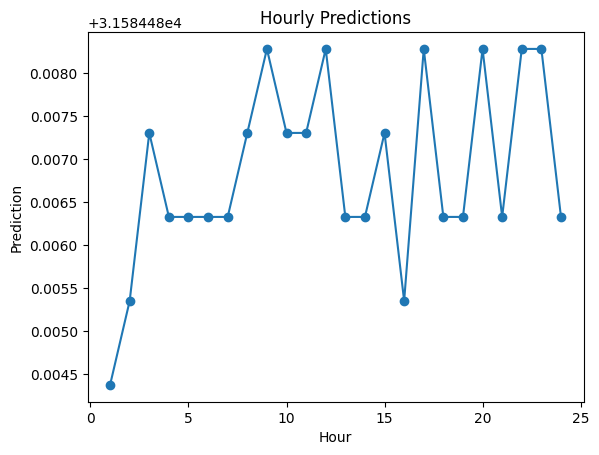

In [89]:
plt.plot(range(1, 25), y_pred_pd[0], marker='o')
plt.xlabel('Hour')
plt.ylabel('Prediction')
plt.title('Hourly Predictions')
plt.savefig('Tomorrow_Solar_Energy(hourly).png')
plt.show()

In [ ]:
from joblib import dump
dump(ss, 'scaler.joblib')